## **LOGISTIC REGRESSION — TP 3**
1. Problem 1
Given the dataset "data_3_1_2.csv", build two logistic regression models:

Model1

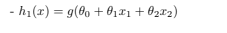

In [ ]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load data
df = pd.read_csv('/content/data_3_1_2 - data_3_1_2.csv')
data_array = df.to_numpy()
#data_array.shape
x1 = data_array[:, 0]
x1_scaled = (x1 - x1.mean())/(x1.max()-x1.min())
x2 = data_array[:, 1]
x2_scaled = (x2 - x2.mean())/(x2.max()-x2.min())
y = data_array[:, 2]

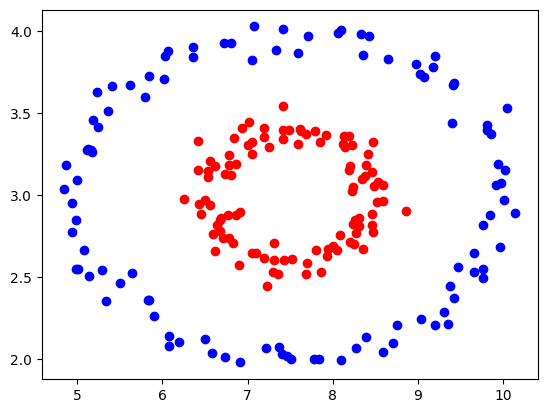

In [ ]:
# plot
plt.scatter(x1[y==0], x2[y==0], color='blue')
plt.scatter(x1[y==1], x2[y==1], color='red')
plt.show()

In [ ]:
y = y.reshape(-1,1)

In [ ]:
X = np.concatenate((np.ones((len(x1),1)), x1_scaled.reshape(-1,1), x2_scaled.reshape(-1,1)), axis=1)
X[:5]

array([[ 1.        ,  0.29906291,  0.35429722],
       [ 1.        , -0.12923862,  0.45629819],
       [ 1.        ,  0.14414132, -0.07030015],
       [ 1.        ,  0.18287172,  0.07318448],
       [ 1.        , -0.13415077,  0.09417033]])

In [ ]:
def sigmoid(z):
  g = 1/(1+np.exp(-z))
  return g

def hyp(X, theta):
  z = np.matmul(X, theta)
  h = sigmoid(z)
  return h

def cost_func(X, theta, y):
  h = hyp(X, theta)
  cost = -y*np.log(h) - (1-y)*np.log(1-h)
  cost = cost.mean()
  return cost

def grad(X, theta, y):
  h = hyp(X, theta)
  g = np.matmul(X.transpose(), h-y)
  g = g/len(X)
  return g

iter: 0, cost = 0.6931471805599452
iter: 1000, cost = 0.6930021712342603
iter: 2000, cost = 0.6929967984461024
iter: 3000, cost = 0.692996598834726
iter: 4000, cost = 0.6929965914052125
iter: 5000, cost = 0.6929965911282866
iter: 6000, cost = 0.6929965911179518
iter: 7000, cost = 0.6929965911175657
iter: 8000, cost = 0.6929965911175512
iter: 9000, cost = 0.6929965911175506
iter: 10000, cost = 0.6929965911175506
iter: 11000, cost = 0.6929965911175506
iter: 12000, cost = 0.6929965911175506
iter: 13000, cost = 0.6929965911175506
iter: 14000, cost = 0.6929965911175506
iter: 15000, cost = 0.6929965911175506
iter: 16000, cost = 0.6929965911175506
iter: 17000, cost = 0.6929965911175506
iter: 18000, cost = 0.6929965911175506
iter: 19000, cost = 0.6929965911175506
iter: 20000, cost = 0.6929965911175506
iter: 21000, cost = 0.6929965911175506
iter: 22000, cost = 0.6929965911175506
iter: 23000, cost = 0.6929965911175506
iter: 24000, cost = 0.6929965911175506
iter: 25000, cost = 0.6929965911175506


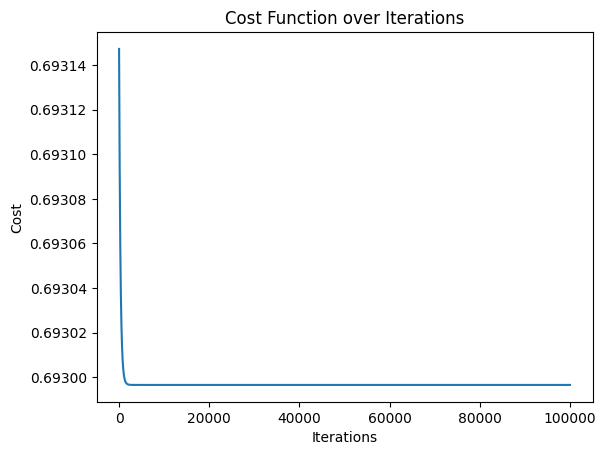

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X, theta, y, cost_func, and grad are defined elsewhere

theta = np.zeros((3, 1), dtype=float)
alpha = 0.1
cost_history = []  # List to store the cost at each iteration

for iter in range(100000):
    cost = cost_func(X, theta, y)
    g = grad(X, theta, y)

    theta = theta - alpha * g

    if iter % 1000 == 0:
        print(f"iter: {iter}, cost = {cost}")

    cost_history.append(cost)  # Append the cost to the history list

# Plotting the cost history
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()


In [ ]:
# Evaluate
# set the value of threshold
threshold = 0.5

# value of parameter found by the gradient descent
print(f'theta = {theta}')

# output value of input variable
h = hyp(X, theta)

# prediction values
pred = []
for value in h:
  if value >= 0.5:
    pred.append(1)
  else:
    pred.append(0)

# compare prediciton and target
for i in range(len(y)):
  print(f'prediction = {pred[i]}, actual= {y[i,0]}')

# calculate acuracy
num_correct = len([i for i in range(len(y)) if pred[i]==y[i,0]])
rate = (num_correct/len(y))*100
print(f'Acuracy = {rate}%')

theta = [[-6.20956480e-08]
 [ 1.22664225e-01]
 [ 5.69700577e-02]]
prediction = 1, actual= 0.0
prediction = 1, actual= 0.0
prediction = 1, actual= 1.0
prediction = 1, actual= 1.0
prediction = 0, actual= 1.0
prediction = 0, actual= 1.0
prediction = 0, actual= 0.0
prediction = 0, actual= 1.0
prediction = 0, actual= 0.0
prediction = 1, actual= 1.0
prediction = 0, actual= 1.0
prediction = 0, actual= 1.0
prediction = 0, actual= 0.0
prediction = 0, actual= 1.0
prediction = 0, actual= 1.0
prediction = 1, actual= 1.0
prediction = 0, actual= 1.0
prediction = 0, actual= 0.0
prediction = 0, actual= 0.0
prediction = 1, actual= 0.0
prediction = 0, actual= 0.0
prediction = 0, actual= 1.0
prediction = 1, actual= 1.0
prediction = 0, actual= 0.0
prediction = 1, actual= 0.0
prediction = 1, actual= 1.0
prediction = 0, actual= 1.0
prediction = 0, actual= 1.0
prediction = 0, actual= 0.0
prediction = 1, actual= 1.0
prediction = 1, actual= 1.0
prediction = 0, actual= 0.0
prediction = 1, actual= 1.0
prediction

Model2

image.png

In [ ]:
df = pd.read_csv('/content/data_3_1_2 - data_3_1_2.csv')
data_array = df.to_numpy()

# Extract features and target variable
x1 = data_array[:, 0]
x1_scaled = (x1 - x1.mean()) / (x1.max() - x1.min())
x2 = data_array[:, 1]
x2_scaled = (x2 - x2.mean()) / (x2.max() - x2.min())
y = data_array[:, 2]
y = y.reshape(-1, 1)

In [ ]:
# Concatenate features with bias term and squared terms
X = np.concatenate((
    np.ones((len(x1), 1)),
    x1_scaled.reshape(-1, 1),
    x2_scaled.reshape(-1, 1),
    (x1_scaled**2).reshape(-1, 1),
    (x2_scaled**2).reshape(-1, 1)
), axis=1)



In [ ]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def hyp2(X, theta):
    z = np.matmul(X, theta)
    h = sigmoid(z)
    return h

def cost_func(X, theta, y):
    h = hyp2(X, theta)
    cost = -y * np.log(h) - (1 - y) * np.log(1 - h)
    cost = cost.mean()
    return cost

def grad(X, theta, y):
    h = hyp2(X, theta)
    g = np.matmul(X.transpose(), h - y)
    g = g / len(X)
    return g


Streaming output truncated to the last 5000 lines.
Iteration: 5000000, Cost: 0.0008365833136092333
Iteration: 5001000, Cost: 0.0008364317724252591
Iteration: 5002000, Cost: 0.0008362802888896197
Iteration: 5003000, Cost: 0.0008361288629688522
Iteration: 5004000, Cost: 0.0008359774946295382
Iteration: 5005000, Cost: 0.0008358261838382749
Iteration: 5006000, Cost: 0.0008356749305616848
Iteration: 5007000, Cost: 0.0008355237347664216
Iteration: 5008000, Cost: 0.0008353725964191697
Iteration: 5009000, Cost: 0.0008352215154866032
Iteration: 5010000, Cost: 0.0008350704919354942
Iteration: 5011000, Cost: 0.000834919525732571
Iteration: 5012000, Cost: 0.0008347686168446255
Iteration: 5013000, Cost: 0.0008346177652384572
Iteration: 5014000, Cost: 0.0008344669708809014
Iteration: 5015000, Cost: 0.0008343162337388048
Iteration: 5016000, Cost: 0.0008341655537790756
Iteration: 5017000, Cost: 0.0008340149309686093
Iteration: 5018000, Cost: 0.0008338643652743447
Iteration: 5019000, Cost: 0.0008337138

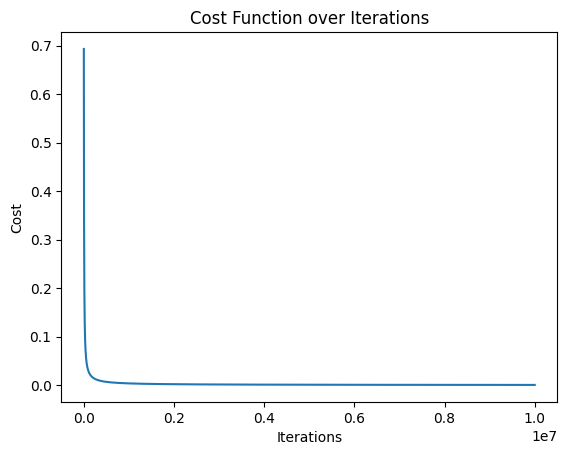

In [ ]:
# Initialize parameters and learning rate
theta = np.zeros((5, 1), dtype=float)
alpha = 0.1
num_iterations = 10000000
cost_history = []

# Gradient Descent
for iter in range(num_iterations):
    cost = cost_func(X, theta, y)
    g = grad(X, theta, y)
    theta = theta - alpha * g

    if iter % 1000 == 0:
        print(f"Iteration: {iter}, Cost: {cost}")

    cost_history.append(cost)

# Plotting the cost history
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

In [ ]:
# Evaluate
h = hyp2(X, theta)
predictions = (h >= 0.5).astype(int)
accuracy = np.mean(predictions == y) * 100
print(f"Theta: {theta.flatten()}")
print(f"Accuracy: {accuracy}%")

Theta: [  8.55415753  -0.07978544  -0.43772655 -67.60359874 -67.22552317]
Accuracy: 100.0%


In [ ]:
# Evaluate
h = hyp2(X, theta)
predictions = (h >= 0.5).astype(int)
accuracy = np.mean(predictions == y) * 100
print(f"Theta: {theta.flatten()}")
print(f"Accuracy: {accuracy}%")

# Display actual vs predicted for all examples
print("Actual vs Predicted:")
for i in range(len(y)):
    print(f"Actual = {y[i, 0]}, Predicted = {predictions[i, 0]}")

Theta: [  8.55415753  -0.07978544  -0.43772655 -67.60359874 -67.22552317]
Accuracy: 100.0%
Actual vs Predicted:
Actual = 0.0, Predicted = 0
Actual = 0.0, Predicted = 0
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 0.0, Predicted = 0
Actual = 1.0, Predicted = 1
Actual = 0.0, Predicted = 0
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 0.0, Predicted = 0
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 0.0, Predicted = 0
Actual = 0.0, Predicted = 0
Actual = 0.0, Predicted = 0
Actual = 0.0, Predicted = 0
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 0.0, Predicted = 0
Actual = 0.0, Predicted = 0
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 0.0, Predicted = 0
Actual = 1.0, Predicted = 1
Actual = 1.0, Predicted = 1
Actual = 0.0, Predic

Thus, Model 2 with 100% accuracy is better than Model 1 with 51.5% accuracy

## **Problem 2**

Given the dataset "data_3_2.csv", build a multiclass (4 class) classification model to fit this data. You can
choose your own hypothesis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/data_3_2 - data_3_2.csv')

# Extract features and target variable
X = df[['x1', 'x2']].values
y = df['class'].values

# Feature scaling (standardization)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# Add intercept term to X
X_scaled = np.insert(X_scaled, 0, 1, axis=1)



In [ ]:
# Define softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define softmax regression hypothesis
def softmax_hypothesis(X, theta):
    z = np.dot(X, theta)
    return softmax(z)

# Define cross-entropy cost function
def cross_entropy_cost(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred)) / m


In [ ]:
# One-hot encode the target variable
num_classes = len(np.unique(y))
num_features = X_scaled.shape[1]
y_encoded = np.eye(num_classes)[y]

# Initialize parameters theta
theta = np.zeros((num_features, num_classes))

In [ ]:
y_encoded

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [ ]:
# Define gradient descent function for softmax regression for each class
def gradient_descent_softmax_per_class(X, y, theta, alpha, iterations):
    m = X.shape[0]
    cost_history_per_class = [[] for _ in range(num_classes)]

    for i in range(iterations):
        y_pred = softmax_hypothesis(X, theta)
        for class_label in range(num_classes):
            class_indices = np.where(y == class_label)
            y_encoded_class = y_encoded[class_indices][:, class_label]
            y_pred_class = y_pred[class_indices][:, class_label]
            cost_class = cross_entropy_cost(y_encoded_class, y_pred_class)

            gradient_class = np.dot(X[class_indices].T, (y_pred_class - y_encoded_class)) / len(class_indices[0])
            theta[:, class_label] -= alpha * gradient_class
            cost_history_per_class[class_label].append(cost_class)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {[np.mean(cost_history_per_class[c]) for c in range(num_classes)]}")

    return theta, cost_history_per_class


Iteration 0: Cost = [1.3862943611198908, 1.3862943611198908, 1.3862943611198908, 1.3862943611198908]
Iteration 100: Cost = [0.41539157423260437, 0.2162776799489749, 0.4015696075184465, 0.3713193767473584]
Iteration 200: Cost = [0.29978791025119417, 0.1437793922017353, 0.2931084737814981, 0.24562507118226468]
Iteration 300: Cost = [0.24805345895447756, 0.11331745393803647, 0.2439347298957491, 0.1935397585337628]
Iteration 400: Cost = [0.2173522060346091, 0.09598031989329174, 0.2142520058014348, 0.16426728013631794]
Iteration 500: Cost = [0.19655782946549816, 0.08461384807912224, 0.19383207464868527, 0.145265294811724]
Iteration 600: Cost = [0.18133586017886252, 0.0765164053624702, 0.17867760955222878, 0.13183471161346358]
Iteration 700: Cost = [0.169605316468633, 0.07042259446873676, 0.16685683423643216, 0.1217907610857961]
Iteration 800: Cost = [0.16022808784950537, 0.06565443199105123, 0.15730531209394982, 0.11397082393123087]
Iteration 900: Cost = [0.1525232426389911, 0.0618133048135

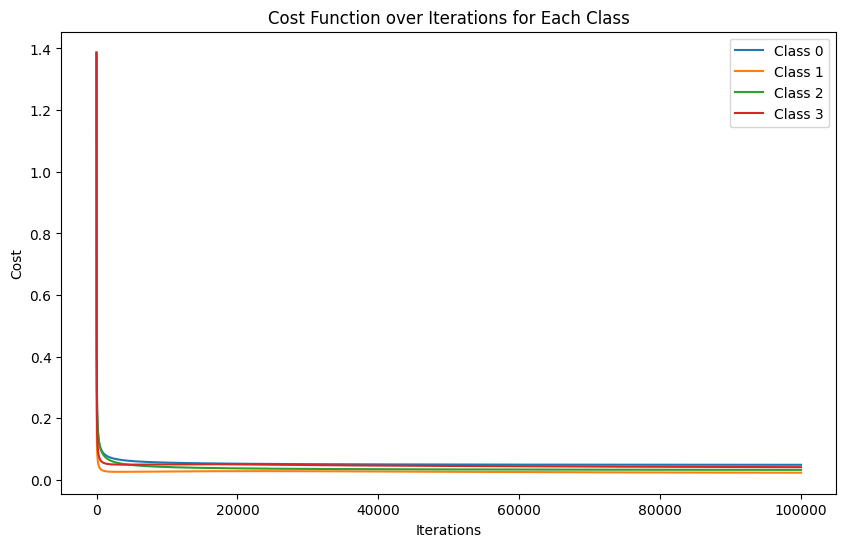

In [ ]:
# Set hyperparameters
alpha = 0.1
iterations = 100000

# Train the softmax regression model for each class
theta, cost_history_per_class = gradient_descent_softmax_per_class(X_scaled, y, theta, alpha, iterations)

# Plot the cost history for each class
plt.figure(figsize=(10, 6))
for class_label, costs in enumerate(cost_history_per_class):
    plt.plot(range(iterations), costs, label=f'Class {class_label}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations for Each Class')
plt.legend()
plt.show()


In [ ]:
# Calculate predicted probabilities for each class
y_pred_prob = softmax_hypothesis(X_scaled, theta)

# Get the predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Display the predicted and actual values for each class
for class_label in range(num_classes):
    class_indices = np.where(y == class_label)[0]
    predicted_values = y_pred[class_indices]
    actual_values = y[class_indices]

    for i in range(len(predicted_values)):
        print(f"Class {class_label} - Actual: {actual_values[i]}, Predicted: {predicted_values[i]}")

Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actual: 0, Predicted: 0
Class 0 - Actu

In [ ]:
# Calculate True Positives, True Negatives, False Positives, False Negatives
confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

y_pred_labels = np.argmax(softmax_hypothesis(X_scaled, theta), axis=1)

for actual_class in range(num_classes):
    for predicted_class in range(num_classes):
        confusion_matrix[actual_class, predicted_class] = np.sum((y == actual_class) & (y_pred_labels == predicted_class))

TP = np.diag(confusion_matrix)
FP = np.sum(confusion_matrix, axis=1) - TP
FN = np.sum(confusion_matrix, axis=0) - TP
TN = np.sum(confusion_matrix) - (TP + FP + FN)

# Calculate Precision, Recall, F1 Score, and Accuracy using TP, TN, FP, FN
precision_TP = TP / (TP + FP + 1e-9)
recall_TP = TP / (TP + FN + 1e-9)
f1_score_TP = 2 * (precision_TP * recall_TP) / (precision_TP + recall_TP + 1e-9)
accuracy_TP = (TP + TN) / (TP + TN + FP + FN)

# Display Precision, Recall, F1 Score, and Accuracy using TP, TN, FP, FN
for class_label in range(num_classes):
    print(f"Class {class_label}: Precision = {precision_TP[class_label]}, Recall = {recall_TP[class_label]}, F1 Score = {f1_score_TP[class_label]}, Accuracy = {accuracy_TP[class_label]}")

# Calculate Overall Precision, Recall, F1 Score, and Accuracy using TP, TN, FP, FN
precision_overall_TP = np.mean(precision_TP)
recall_overall_TP = np.mean(recall_TP)
f1_score_overall_TP = np.mean(f1_score_TP)


print(f"Overall Precision (TP): {precision_overall_TP}")
print(f"Overall Recall (TP): {recall_overall_TP}")
print(f"Overall F1 Score (TP): {f1_score_overall_TP}")


Class 0: Precision = 0.9733333333203555, Recall = 0.9864864864731555, F1 Score = 0.9798657712989505, Accuracy = 0.99
Class 1: Precision = 0.9999999999866667, Recall = 0.9868421052501731, F1 Score = 0.9933774829305732, Accuracy = 0.9966666666666667
Class 2: Precision = 0.9866666666535111, Recall = 0.96103896102648, F1 Score = 0.9736842100135906, Accuracy = 0.9866666666666667
Class 3: Precision = 0.9733333333203555, Recall = 0.9999999999863013, F1 Score = 0.9864864859732468, Accuracy = 0.9933333333333333
Overall Precision (TP): 0.9833333333202222
Overall Recall (TP): 0.9835918881840274
Overall F1 Score (TP): 0.9833534875540902


In [ ]:
# Calculate Overall Accuracy using TP, TN, FP, FN
accuracy_overall_TP = np.sum(TP) / np.sum(TP + FP)

print(f"Overall Accuracy (TP): {accuracy_overall_TP * 100}%")


Overall Accuracy (TP): 98.33333333333333%


In [ ]:
# Calculate True Positives, True Negatives, False Positives, False Negatives
confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

y_pred_labels = np.argmax(softmax_hypothesis(X_scaled, theta), axis=1)

for actual, pred in zip(y, y_pred_labels):
    confusion_matrix[actual, pred] += 1

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[73  0  2  0]
 [ 0 75  0  0]
 [ 1  0 74  0]
 [ 0  1  1 73]]


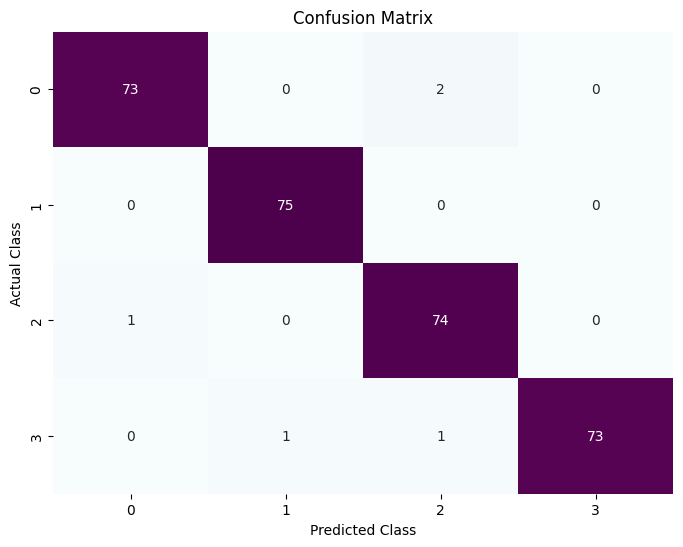

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix with a different color map
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()
